# HEART ATTACK RISK PREDICTION

Data Cleaning
Before we start with generating our models, first we should clean the dataset, and eliminate the unnecessary features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ht=pd.read_csv('heart_attack_prediction_dataset.csv')

#Check the shape and columns, drop the duplicates

In [3]:
ht.shape

(8763, 26)

In [4]:
ht.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
ht.sample(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
5801,UYI6560,85,Male,151,113/64,55,0,1,1,0,...,6.122924,55111,32.951894,142,2,6,India,Asia,Northern Hemisphere,1
5209,TWP4959,50,Male,318,147/80,77,0,1,1,0,...,7.457113,91932,39.717209,466,4,7,Germany,Europe,Northern Hemisphere,0
7604,FDF9449,73,Male,261,106/83,100,1,0,1,1,...,6.838939,50271,39.180575,280,2,6,Colombia,South America,Northern Hemisphere,1
6135,AJQ3986,62,Male,375,136/85,40,0,0,1,1,...,11.628272,116017,36.206402,145,3,8,Australia,Australia,Southern Hemisphere,0
4980,LUV0600,48,Female,168,117/64,91,1,0,1,0,...,0.443447,181631,30.966986,138,3,4,Thailand,Asia,Northern Hemisphere,0


In [6]:
ht.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [7]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [8]:
columns_to_drop = ['Hemisphere', 'Patient ID', 'Continent']

# Use axis=1 to drop columns
ht.drop(columns_to_drop, axis=1, inplace=True)

Drop the Duplicate values if any

In [9]:
ht.drop_duplicates(inplace=True)
ht.shape

(8763, 23)

In [10]:
ht['Age'].min()
ht['Age'].max()
ht['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68], dtype=int64)

In [11]:
ht['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
#In Sex Column which is categorical data we will apply Nominal Encoding to convert to numerical data

In [13]:
ht = pd.get_dummies(ht, columns=['Sex'], drop_first=True)
ht.rename(columns={'Sex_Male': 'is_male'},inplace=True)

# Drop first drops the original 'Sex' column. Now it is True if patient is Male otherwise it is False.

ht['is_male'] = ht['is_male'].astype(int)

# changing type to integer True -> 1 , False -> 0 so it won't be any problem when we use this column in model.

ht.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,Argentina,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,Canada,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,France,0,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,Canada,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,Thailand,0,1


In [14]:
ht['Cholesterol'].value_counts()
ht['Cholesterol'].min()
ht['Cholesterol'].max()
ht['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [15]:
ht['Blood Pressure'].value_counts()

146/94     8
101/93     8
106/64     7
102/104    7
176/77     7
          ..
155/102    1
154/71     1
178/90     1
98/85      1
119/67     1
Name: Blood Pressure, Length: 3915, dtype: int64

We can see that there are not any NULL values for the Blood Pressure. However, it is in number/number format which we cannot use in our modelling. We can separate the columns. Originally: (systolic/diastolic) , now I will create separately two columns systolic_pressure and diastolic_pressure

In [16]:
def handle_blood_pressure_systolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[0])

def handle_blood_pressure_diastolic(value):
    value = str(value)
    value = value.split('/')
    return int(value[1])


ht['systolic_pressure'] = ht['Blood Pressure'].apply(handle_blood_pressure_systolic)
ht['diastolic_pressure'] = ht['Blood Pressure'].apply(handle_blood_pressure_diastolic)

ht.drop(columns='Blood Pressure', axis=1, inplace=True)

ht.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [17]:
ht['Heart Rate'].unique()
ht['Heart Rate'].value_counts()

94     157
97     146
57     143
52     140
104    139
      ... 
70     107
48     107
79     105
96      97
73      93
Name: Heart Rate, Length: 71, dtype: int64

In [18]:
ht['Diabetes'].unique()

array([0, 1], dtype=int64)

In [19]:
ht['Family History'].unique()

array([0, 1], dtype=int64)

In [20]:
ht['Smoking'].unique()

array([1, 0], dtype=int64)

In [21]:
ht['Obesity'].unique()

array([0, 1], dtype=int64)

In [22]:
ht['Alcohol Consumption'].unique()

array([0, 1], dtype=int64)

In [23]:

ht['Exercise Hours Per Week'].value_counts()

4.168189     1
18.477430    1
11.883523    1
19.353157    1
19.365546    1
            ..
9.884039     1
12.644947    1
1.089868     1
10.500477    1
18.081748    1
Name: Exercise Hours Per Week, Length: 8763, dtype: int64

Heart Rate, Diabetes,Smoking,Family History,Obesity,Alcohol Consumption, Exercise hours per week are all clean features

In [24]:
ht['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [25]:
#Diet is also a categorical column and With the changes below, 
#now Unhealthy is represented as 0, Average is represented as 1 and Healthy is represented as 2

In [26]:
def handle_diet(value):
    value = str(value)

    if value == 'Unhealthy':
        return 0
    elif value == 'Average':
        return 1
    elif value == 'Healthy':
        return 2
    else:
        return np.nan
    


ht['Diet'] = ht['Diet'].apply(handle_diet)
ht['Diet']


0       1
1       0
2       2
3       1
4       0
       ..
8758    2
8759    2
8760    1
8761    0
8762    2
Name: Diet, Length: 8763, dtype: int64

In [27]:
ht['Previous Heart Problems'].unique()

array([0, 1], dtype=int64)

In [28]:
ht['Medication Use'].unique()

array([0, 1], dtype=int64)

In [29]:
ht['Stress Level'].unique()

array([ 9,  1,  6,  2,  7,  4,  5,  8, 10,  3], dtype=int64)

In [30]:
ht['Sedentary Hours Per Day'].unique()
ht['Sedentary Hours Per Day'].value_counts()

6.615001     1
0.772688     1
0.723868     1
10.125510    1
2.054331     1
            ..
11.921800    1
0.087028     1
9.198925     1
3.383760     1
9.005234     1
Name: Sedentary Hours Per Day, Length: 8763, dtype: int64

In [31]:
ht['Income'].unique()
ht['Income'].value_counts()

225278    4
194461    3
195282    3
220507    2
139451    2
         ..
44744     1
85563     1
20443     1
258704    1
247338    1
Name: Income, Length: 8615, dtype: int64

In [32]:
ht['BMI'].unique()
ht['BMI'].value_counts()

31.251233    1
39.385227    1
36.280438    1
18.218558    1
23.885840    1
            ..
28.358868    1
22.539845    1
34.721372    1
18.881817    1
32.914151    1
Name: BMI, Length: 8763, dtype: int64

In [33]:
ht['Triglycerides'].unique()
ht['Triglycerides'].value_counts()

799    25
507    22
121    22
593    22
469    22
       ..
120     3
213     3
185     3
295     3
130     2
Name: Triglycerides, Length: 771, dtype: int64

In [34]:
ht['Physical Activity Days Per Week'].unique()

array([0, 1, 4, 3, 5, 6, 7, 2], dtype=int64)

In [35]:
ht['Sleep Hours Per Day'].unique()

array([ 6,  7,  4,  5, 10,  8,  9], dtype=int64)

In [36]:
ht['Heart Attack Risk'].unique()

array([0, 1], dtype=int64)

In [37]:
ht['Country'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ht['Country'] = label_encoder.fit_transform(ht['Country'])

In [39]:
ht.count()

Age                                8763
Cholesterol                        8763
Heart Rate                         8763
Diabetes                           8763
Family History                     8763
Smoking                            8763
Obesity                            8763
Alcohol Consumption                8763
Exercise Hours Per Week            8763
Diet                               8763
Previous Heart Problems            8763
Medication Use                     8763
Stress Level                       8763
Sedentary Hours Per Day            8763
Income                             8763
BMI                                8763
Triglycerides                      8763
Physical Activity Days Per Week    8763
Sleep Hours Per Day                8763
Country                            8763
Heart Attack Risk                  8763
is_male                            8763
systolic_pressure                  8763
diastolic_pressure                 8763
dtype: int64

In [40]:
#This shows that there are no null values in the data

In [41]:
ht.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,158263.181901,28.891446,417.677051,3.489672,7.023508,9.382175,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,80575.190806,6.319181,223.748137,2.282687,1.988473,5.788964,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,88310.000000,23.422985,225.500000,2.000000,5.000000,4.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,157866.000000,28.768999,417.000000,3.000000,7.000000,9.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,227749.000000,34.324594,612.000000,5.000000,9.000000,14.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,1.000000,1.000000,180.000000,110.000000


In [42]:
ht.duplicated().sum()

0

In [43]:
#Exploratory Data Analysis

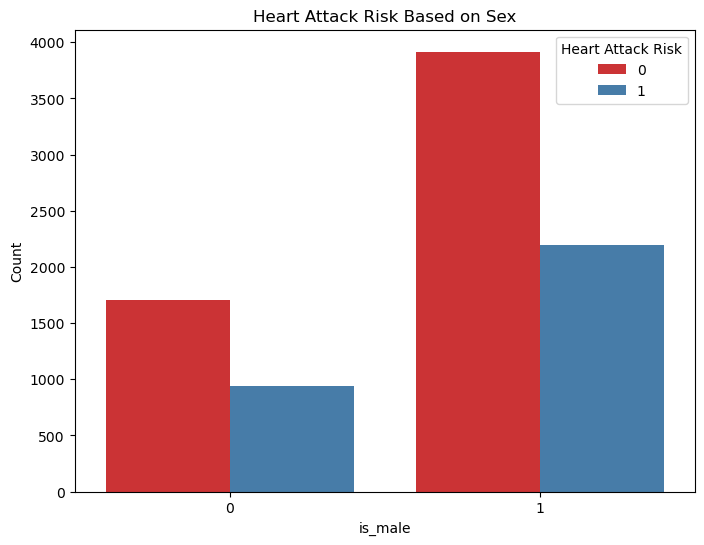

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_male', hue='Heart Attack Risk', data=ht, palette='Set1')
plt.xlabel('is_male')
plt.ylabel('Count')
plt.title('Heart Attack Risk Based on Sex')
plt.legend(title='Heart Attack Risk', loc='upper right')


In [45]:
#Males have more cases of heart attack

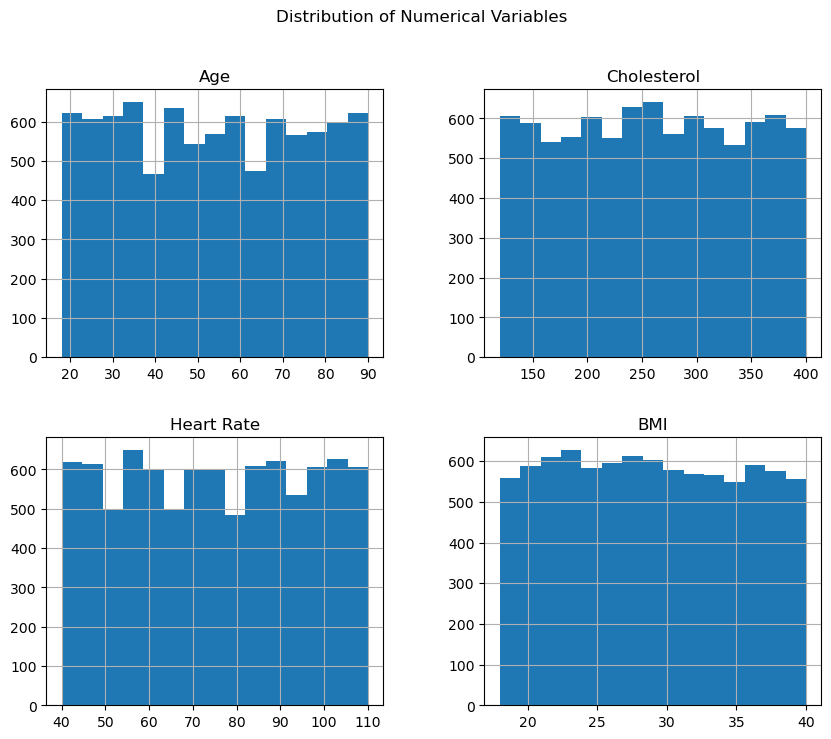

C:\Users\Ashina Shaji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


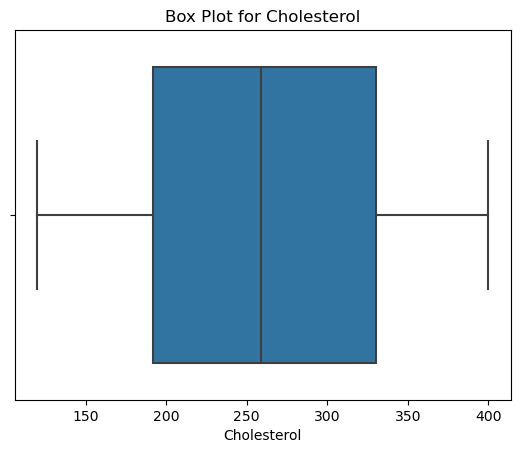

In [46]:
# Example for numerical variables
ht[['Age', 'Cholesterol', 'Heart Rate', 'BMI']].hist(bins=15, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Box plot for Cholesterol
sns.boxplot(ht['Cholesterol'])
plt.title('Box Plot for Cholesterol')
plt.show()


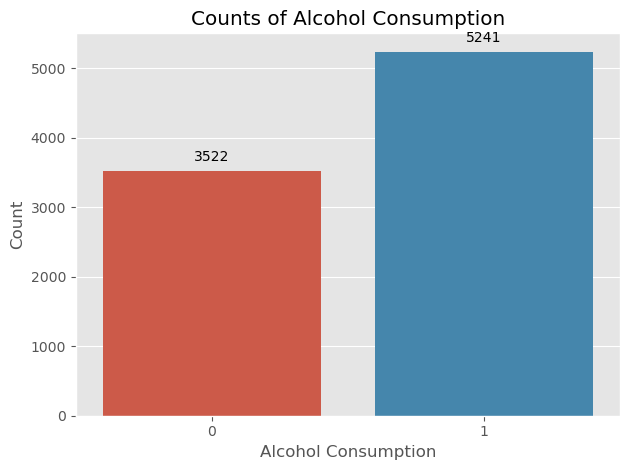

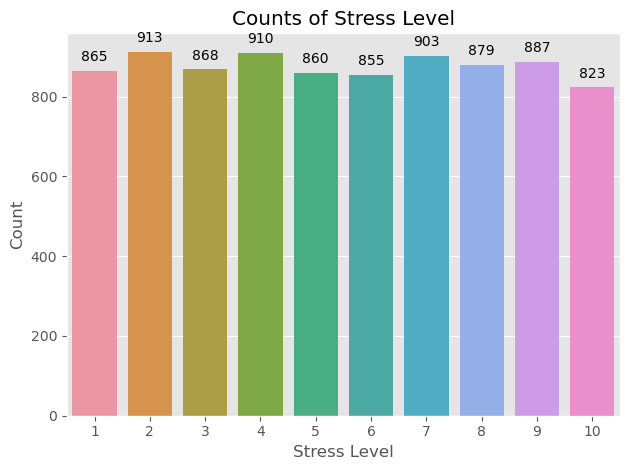

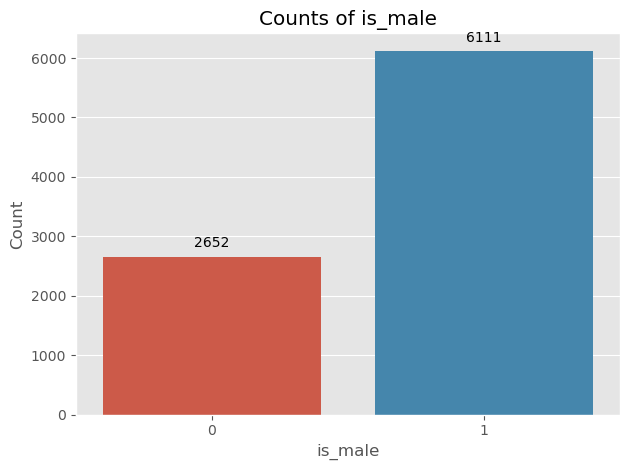

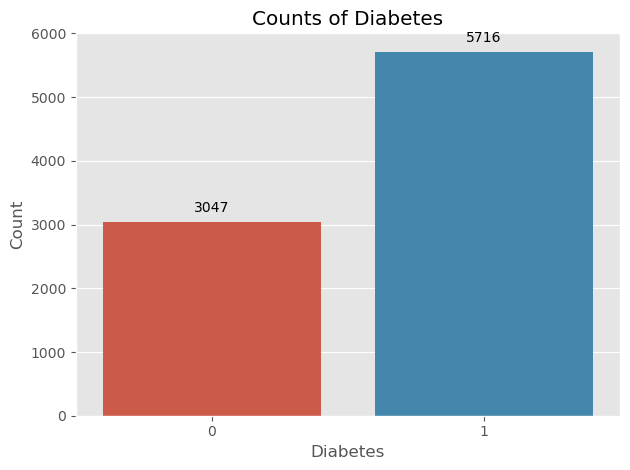

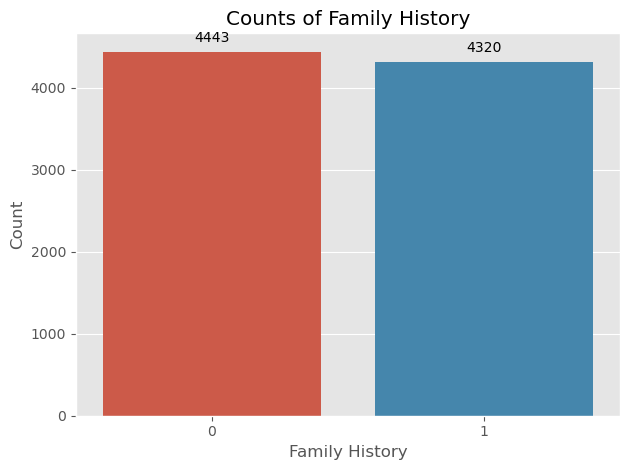

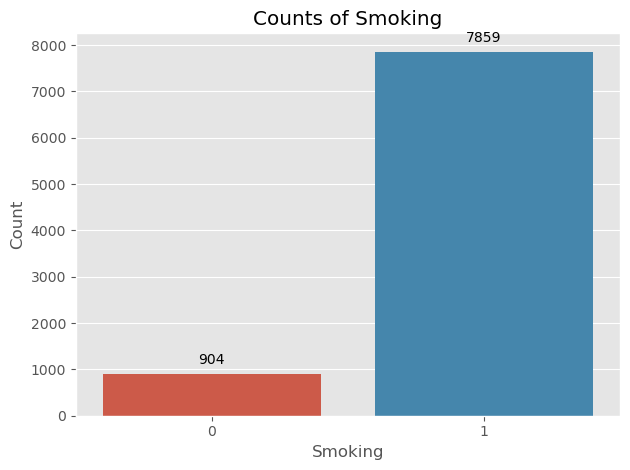

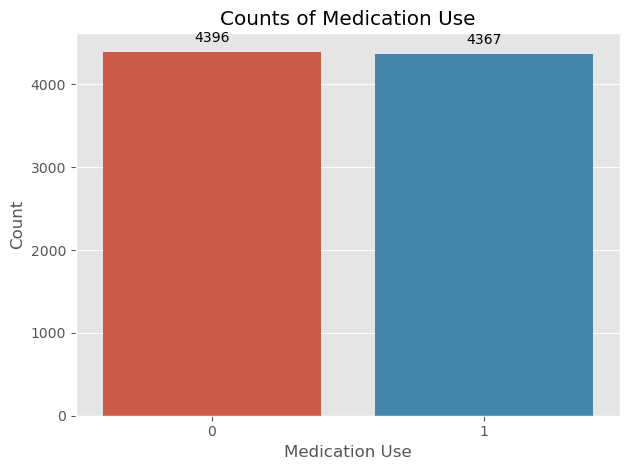

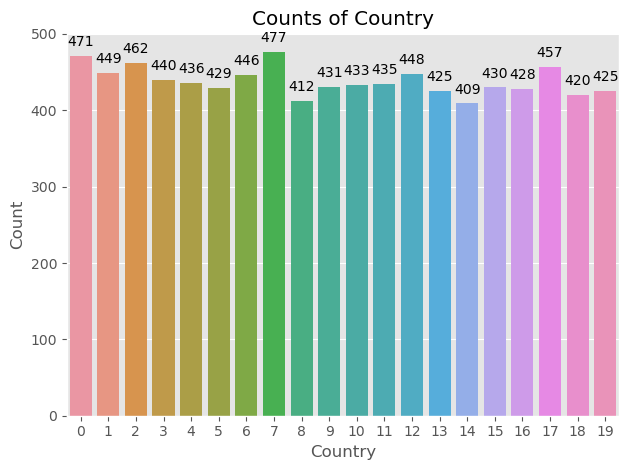

In [47]:
plt.style.use('ggplot')


plots_to_show = ht[['Alcohol Consumption', 'Stress Level', 'is_male','Diabetes','Family History','Smoking','Medication Use', 'Country']]

for i in plots_to_show.columns:
    ctg_num = plots_to_show[i].value_counts()
    chart = sns.barplot(x=ctg_num.index, y=ctg_num)
    
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=10)
    
    plt.style.use('ggplot')
    plt.title(f'Counts of {i}')  # Set title for each plot
    plt.xlabel(i)  # Set x-axis label based on the column name
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    
    plt.show()


In [48]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

<AxesSubplot:ylabel='Heart Attack Risk'>

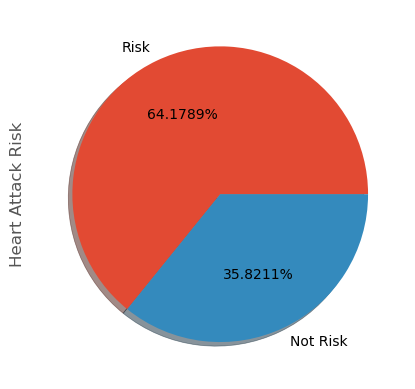

In [49]:
plt.style.use('ggplot')

ht['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})

#Above you can see that the actual values for patients that can have a Heart Attack (Risky), 
and patients who are not likely to have a heart attack

In [50]:
ht['Heart Attack Risk'].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [51]:
ht.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,is_male,systolic_pressure,diastolic_pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,158263.181901,28.891446,417.677051,3.489672,7.023508,9.382175,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,80575.190806,6.319181,223.748137,2.282687,1.988473,5.788964,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,88310.000000,23.422985,225.500000,2.000000,5.000000,4.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,157866.000000,28.768999,417.000000,3.000000,7.000000,9.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,227749.000000,34.324594,612.000000,5.000000,9.000000,14.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,1.000000,1.000000,180.000000,110.000000


Above we can see that our Data is not balanced, it is %64 percent to %35 percent.
Therefore, we should make the data balanced. In the mean section for Heart Attack Risk, the value is 0.358211. 
It should be closer to 0.5 so that we can achieve the balanced data.

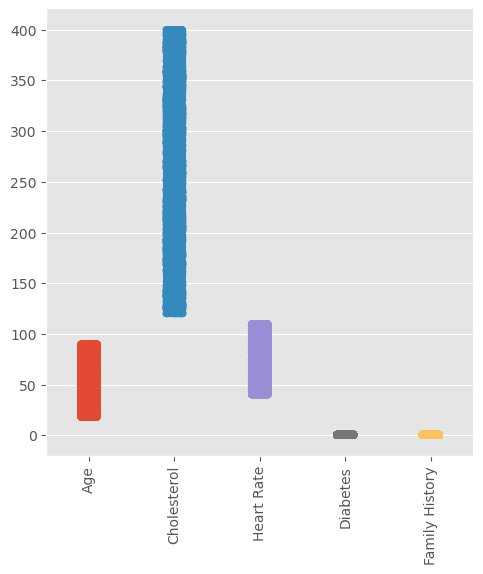

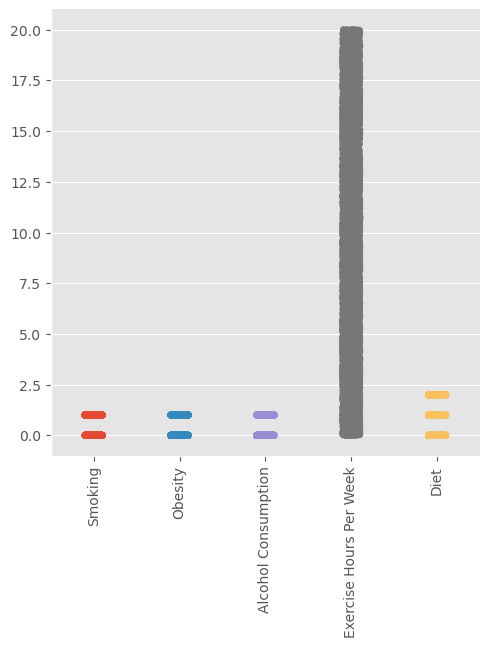

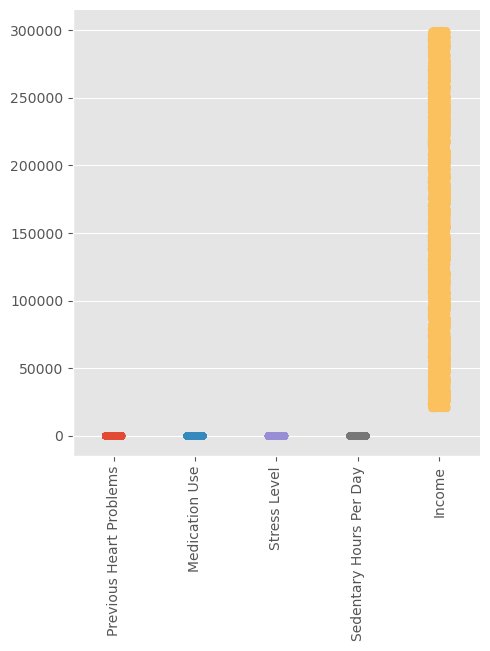

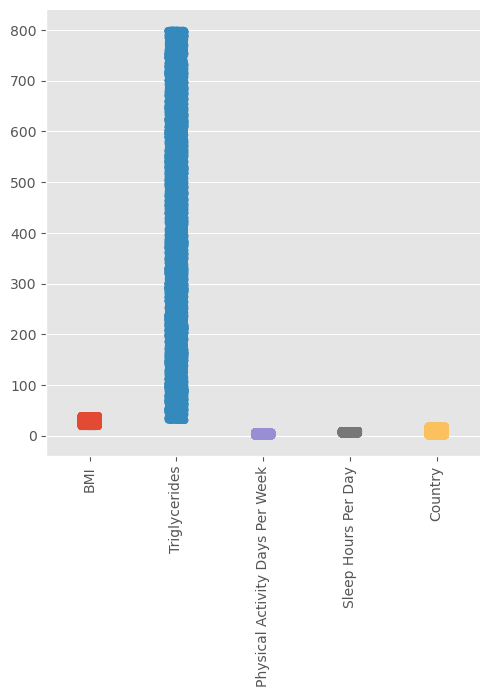

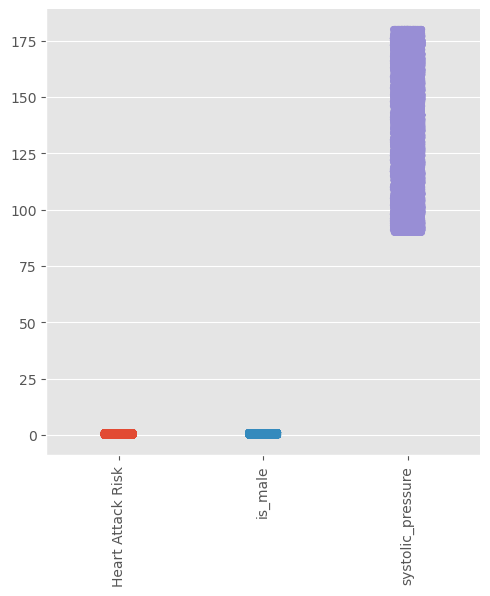

In [52]:
plots = []

plots.append(sns.catplot(data=ht.iloc[:, 0:5]))
plots.append(sns.catplot(data=ht.iloc[:, 5:10]))
plots.append(sns.catplot(data=ht.iloc[:, 10:15]))
plots.append(sns.catplot(data=ht.iloc[:, 15:20]))
plots.append(sns.catplot(data=ht.iloc[:, 20:23]))


for i in range(5):
    plots[i].set_xticklabels(rotation=90)

Inference from the CatPlot
Above you can see the distribution of the values for each feature. For example, Previous Heart Attack Problems(1/0), Medication Use(1/0) are discrete values meaning that they represent a binary value (Yes/No). However, systolic_pressure and diastolic_pressure hold values such as 127, 128,235 etc.
In addition to the values, we can observe that our data doesn't contain any outlier values. So we don't have to worry about them.

<AxesSubplot:>

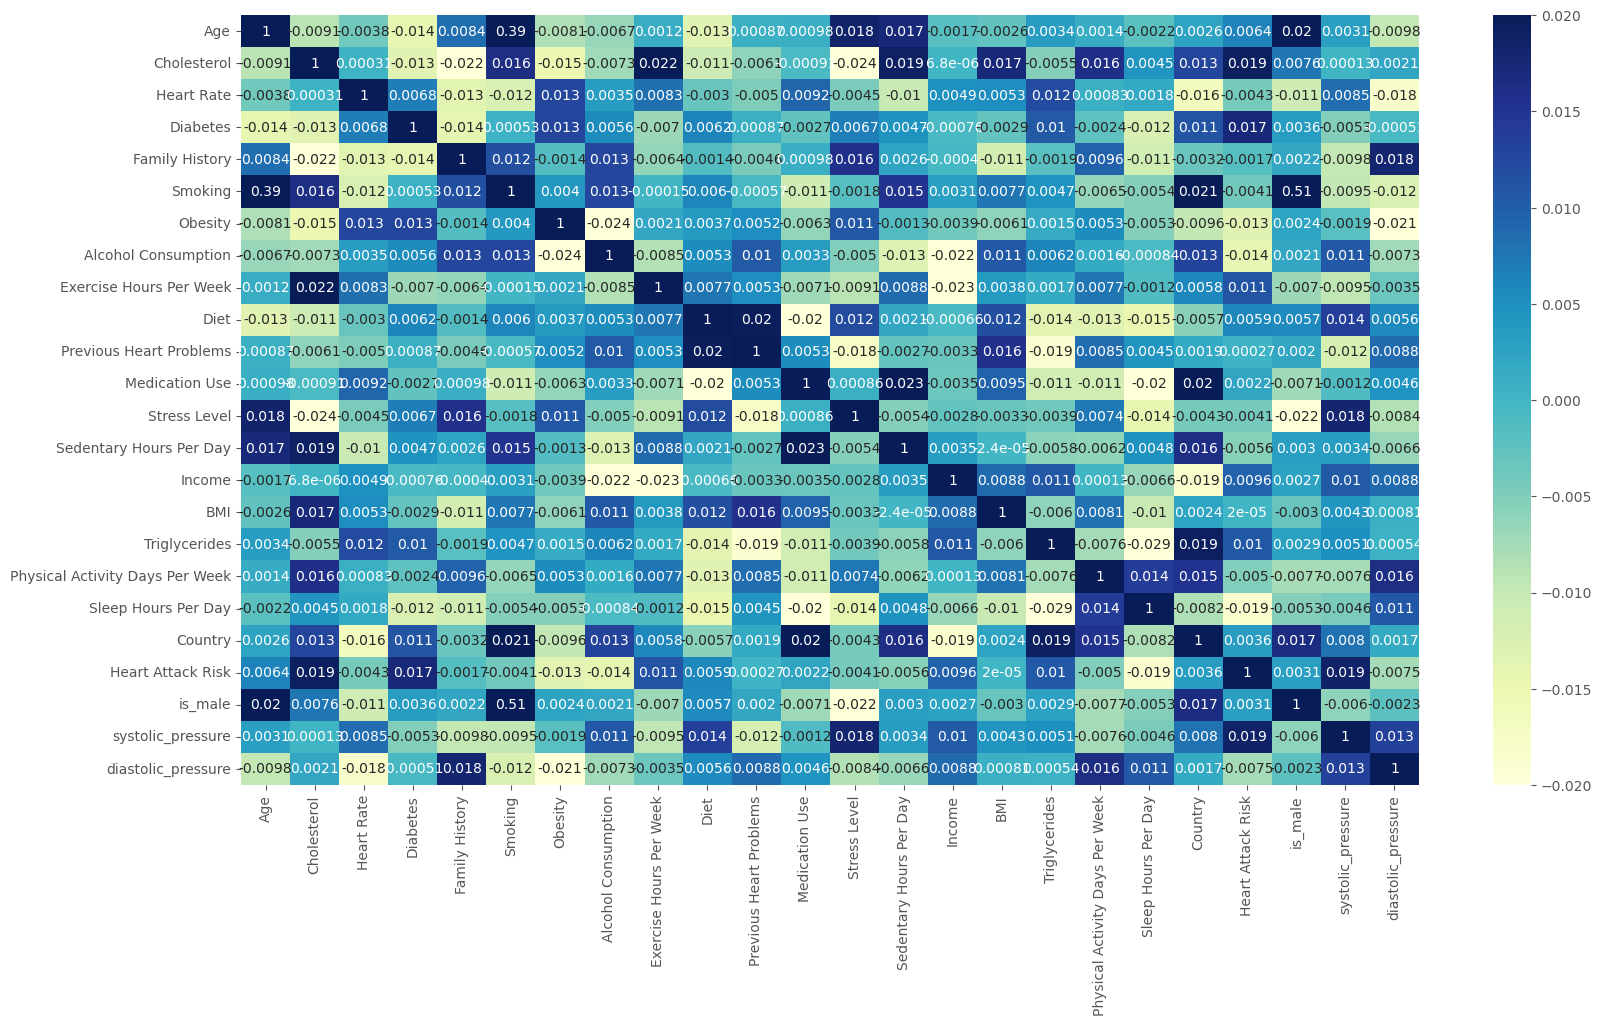

In [53]:
#HeatMap
plt.figure(figsize = (19,10))
corelation=ht.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

In [54]:
columns_to_drop = ['BMI','Previous Heart Problems']

ht.drop(columns_to_drop, axis=1, inplace=True)

Random Over Sampling: We have applied the RandomOverSampler to address class imbalance in your target variable (Heart Attack Risk). This is crucial because imbalanced classes can lead to biased models that perform poorly on the minority class.
Balancing Classes: By setting sampling_strategy=1, we have ensured that the minority class is resampled to match the majority class, resulting in equal representation of both classes in your dataset. This helps improve the model's ability to learn from both classes equally.

In [55]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

random_over_sampler = RandomOverSampler(sampling_strategy=1)

y = ht['Heart Attack Risk']
X = ht.drop(['Heart Attack Risk'],axis=1)

X , y = random_over_sampler.fit_resample(X,y)

scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))


print(pd.DataFrame(y).describe())

       Heart Attack Risk
count       11248.000000
mean            0.500000
std             0.500022
min             0.000000
25%             0.000000
50%             0.500000
75%             1.000000
max             1.000000


In [56]:
balanced_ht = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

balanced_ht.to_csv('heart_attack_prediction_dataset_after_cleaning.csv', index=False)

<AxesSubplot:ylabel='Heart Attack Risk'>

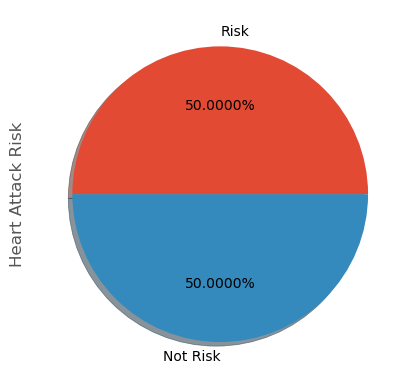

In [57]:
balanced_ht['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=["Risk","Not Risk"], shadow=True,textprops={'color': 'black'})


In [58]:
balanced_ht['Heart Attack Risk'].value_counts()

0    5624
1    5624
Name: Heart Attack Risk, dtype: int64

In [59]:
balanced_ht.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,is_male,systolic_pressure,diastolic_pressure,Heart Attack Risk
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,53.784406,259.607041,75.023026,0.654516,0.491021,0.898560,0.498933,0.597528,10.024341,1.011913,...,5.965311,158986.961060,418.679587,3.482397,7.002312,9.413762,0.698613,135.239420,85.142692,0.500000
std,21.289947,80.617685,20.571274,0.475547,0.499942,0.301924,0.500021,0.490418,5.781712,0.818585,...,3.464017,80552.805959,224.915834,2.299882,1.986886,5.773228,0.458881,26.330056,14.658769,0.500022
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,0.001263,20062.000000,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000,0.000000
25%,35.000000,191.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.014572,0.000000,...,2.976980,88737.250000,223.000000,1.000000,5.000000,4.000000,0.000000,113.000000,72.000000,0.000000
50%,54.000000,258.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.075371,1.000000,...,5.888968,159427.000000,419.000000,3.000000,7.000000,9.000000,1.000000,135.000000,85.000000,0.500000
75%,72.000000,329.250000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.052525,2.000000,...,8.973485,228922.250000,616.000000,6.000000,9.000000,14.000000,1.000000,158.000000,98.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,11.999313,299954.000000,800.000000,7.000000,10.000000,19.000000,1.000000,180.000000,110.000000,1.000000


<AxesSubplot:>

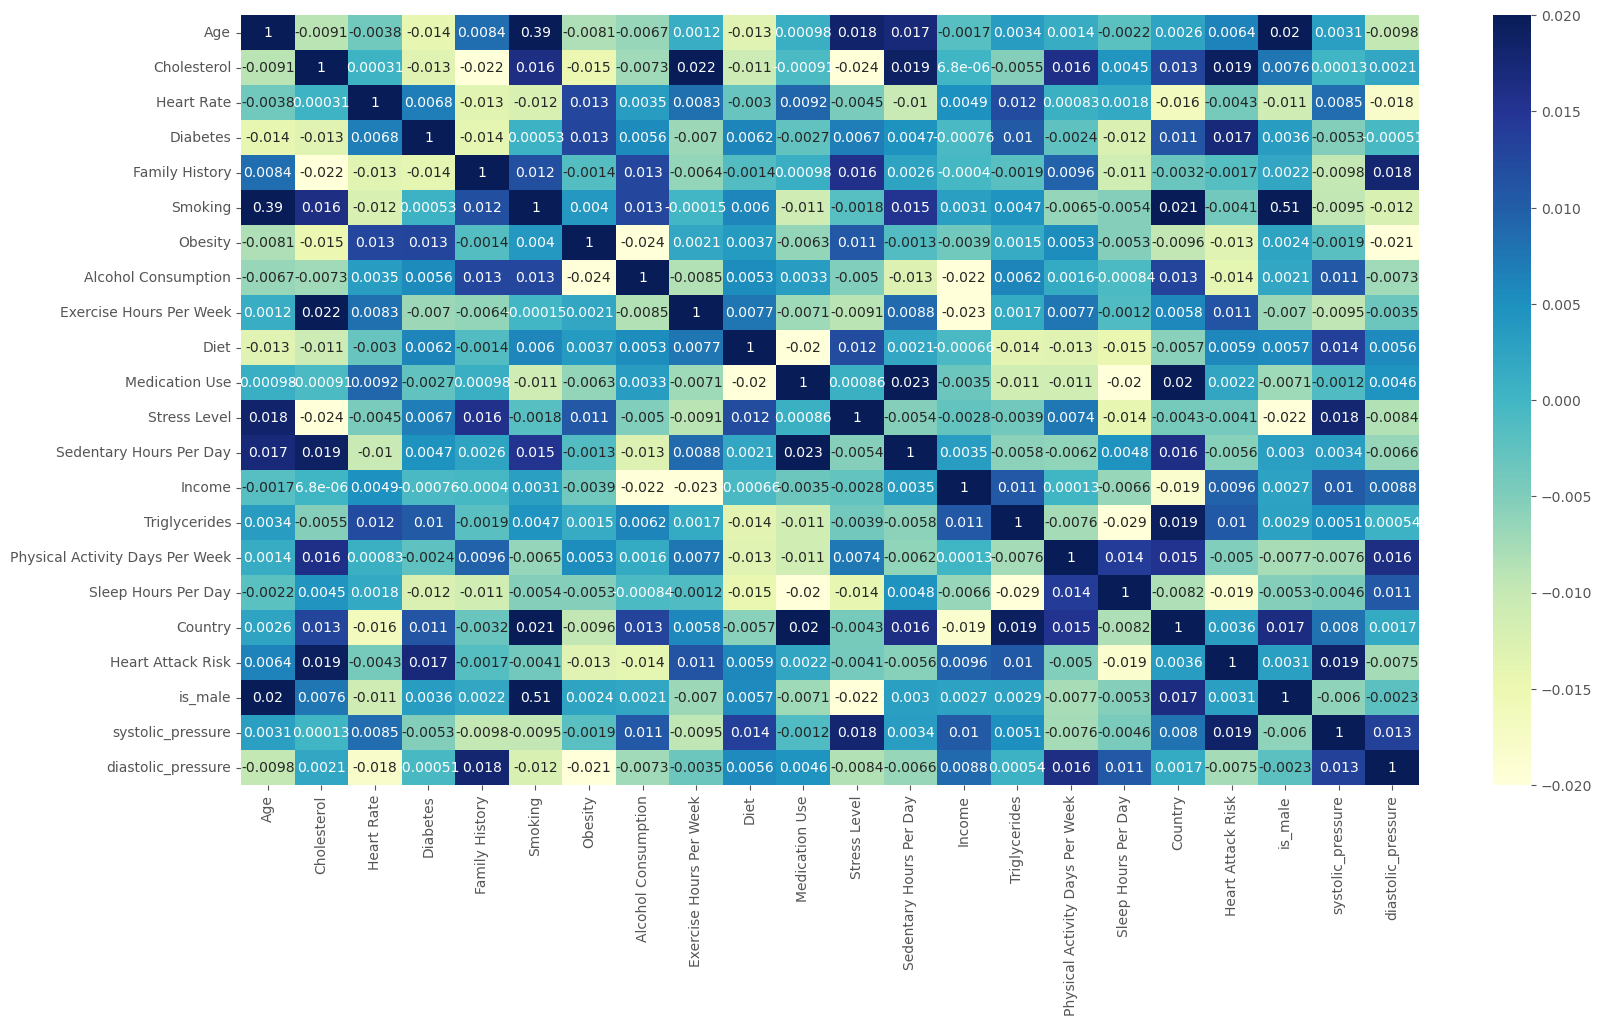

In [60]:
plt.figure(figsize = (19,10))
corelation=ht.corr()
sns.heatmap(corelation, cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)

# MODELLING

In [61]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split data
X = balanced_ht.drop('Heart Attack Risk', axis=1)
y = balanced_ht['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [62]:
#import libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Train Model
model = SVC()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [63]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Train Model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


C:\Users\Ashina Shaji\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
#Import Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Model Training
model1 = GaussianNB()
model1.fit(X_train, y_train)

#Predict
y_pred = model1.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [65]:
#import Libraries
from sklearn.tree import DecisionTreeClassifier

#Train Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [66]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier

#Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [67]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

[[1425  256]
 [ 572 1122]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1681
           1       0.81      0.66      0.73      1694

    accuracy                           0.75      3375
   macro avg       0.76      0.76      0.75      3375
weighted avg       0.76      0.75      0.75      3375

ROC-AUC: 0.7550236794734118


In [68]:
#Import Libraries
from sklearn.ensemble import GradientBoostingClassifier

#Train Model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [69]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

[[948 733]
 [710 984]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1681
           1       0.57      0.58      0.58      1694

    accuracy                           0.57      3375
   macro avg       0.57      0.57      0.57      3375
weighted avg       0.57      0.57      0.57      3375

ROC-AUC: 0.5724118507634813


In [70]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),  # SVC needs probability=True for roc_auc_score
    "KNeighbors Classifier": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize an empty list to store results
results = []

# Loop through classifiers and calculate metrics
for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Adjust based on the problem type
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # For ROC AUC, check if the model has predict_proba or decision_function
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = roc_auc_score(y_test, model.decision_function(X_test))
    
    # Append the results to the list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


C:\Users\Ashina Shaji\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                   Model  Accuracy  Precision  F1 Score   ROC AUC
0    Logistic Regression  0.502222   0.504070  0.507909  0.493134
1          Random Forest  0.762667   0.828550  0.737635  0.808392
2          Decision Tree  0.681185   0.656694  0.706492  0.680863
3                    SVC  0.504000   0.517301  0.263204  0.500000
4  KNeighbors Classifier  0.569481   0.566907  0.584263  0.596530
5            Gaussian NB  0.499556   0.501635  0.475954  0.497988
6      Gradient Boosting  0.572148   0.572759  0.576788  0.588939


##### CONCLUSION
For heart attack risk prediction, Random Forest is the recommended model due to its superior performance in both accuracy, precision F1 Score,ROC AUC. Fine-tuning its hyperparameters can potentially enhance its results even further, ensuring that the model reliably identifies at-risk patients.

Other models like Decision Tree and Gradient Boosting can be explored as secondary options, but Random Forest stands out as the most effective choice for this dataset.